In [1]:
import pandas as pd

df = pd.read_csv(r"C:/Users/pc/OneDrive/Desktop/Sales Data Analyzer/Data/Sales.csv.csv")

df.head()


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [3]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [4]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [5]:
# Remove commas (if any) and convert to numeric
df['sales'] = df['sales'].str.replace(',', '', regex=True)

df['sales'] = pd.to_numeric(df['sales'], errors='coerce')


In [6]:
df['order_date']=pd.to_datetime(df['order_date'],format='mixed',dayfirst=True)
df['ship_date']=pd.to_datetime(df['ship_date'],format='mixed',dayfirst=True)


In [7]:
df[['order_date','ship_date']].head()

,order_date,ship_date
0,2011-01-01,2011-01-06
1,2011-01-01,2011-01-08
2,2011-01-01,2011-01-05
3,2011-01-01,2011-01-05
4,2011-01-01,2011-01-08


In [8]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                      int64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [9]:
#total performance -total sales
total_sales=int(df['sales'].sum())


In [10]:
#total profit
int(df['profit'].sum())



1469034

In [11]:
#average order value
int(df['sales'].mean())


246

In [12]:
#top 10 best selling product (by sales)
top_10_products=(df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)) 
print("Top 10 Best-Selling Products:")
print(top_10_products)

Top 10 Best-Selling Products:
product_name
Apple Smart Phone, Full Size                                86936
Cisco Smart Phone, Full Size                                76441
Motorola Smart Phone, Full Size                             73159
Nokia Smart Phone, Full Size                                71904
Canon imageCLASS 2200 Advanced Copier                       61600
Hon Executive Leather Armchair, Adjustable                  58200
Office Star Executive Leather Armchair, Adjustable          50667
Harbour Creations Executive Leather Armchair, Adjustable    50120
Samsung Smart Phone, Cordless                               48654
Nokia Smart Phone, with Caller ID                           47880
Name: sales, dtype: int64


In [13]:
#worst 5 product by profit
worst_5_products=(
    df.groupby('product_name')['profit']
        .sum()
        .sort_values()
        .head(5)
)
print("Worst 5 Product by Profit:")
print(worst_5_products)



Worst 5 Product by Profit:
product_name
Cubify CubeX 3D Printer Double Head Print   -8879.9704
Lexmark MX611dhe Monochrome Laser Printer   -4589.9730
Motorola Smart Phone, Cordless              -4447.0380
Cubify CubeX 3D Printer Triple Head Print   -3839.9904
Bevis Round Table, Adjustable Height        -3649.8940
Name: profit, dtype: float64


In [14]:
loss_products = (
    df.groupby('product_name')['profit']
      .sum()
      .reset_index()
)
loss_products=loss_products[loss_products['profit']<0]
print("Products with loss:")
print(loss_products)





    

Products with loss:
                                           product_name    profit
16    3.6 Cubic Foot Counter Height Office Refrigerator -872.0752
17                             36X48 HARDFLOOR CHAIRMAT  -40.4914
19       3D Systems Cube Printer, 2nd Generation, White -467.9964
25    3M Replacement Filter for Office Air Cleaner f...  -20.4768
34    ARKON Windshield Dashboard Air Vent Car Mount ...  -15.5940
...                                                 ...       ...
3775  XtraLife ClearVue Slant-D Ring Binders by Card...  -13.3280
3776  Zebra GK420t Direct Thermal/Thermal Transfer P... -938.2800
3781                  i.Sound Portable Power - 8000 mAh  -58.8189
3784                         iOttie HLCRIO102 Car Mount  -11.9940
3785                                iOttie XL Car Mount  -50.3748

[677 rows x 2 columns]


In [15]:
#region-wise profit
region_profit=(
    df.groupby('region')['profit']
    .sum()
)
print("profit by region:")
print(region_profit)    
    

profit by region:
region
Africa             88871.63100
Canada             17817.39000
Caribbean          34571.32104
Central           311403.98164
Central Asia      132480.18700
EMEA               43897.97100
East               91522.78000
North             194597.95252
North Asia        165578.42100
Oceania           121666.64200
South             140355.76618
Southeast Asia     17852.32900
West              108418.44890
Name: profit, dtype: float64


In [16]:
#region earns the most
best_region= region_profit.idxmax()
best_value= region_profit.max()
print("Highest profit region:", best_region)
print("profit:", best_value)

Highest profit region: Central
profit: 311403.98164


In [17]:
#both top region and worst region 
region_profit = df.groupby('region')['profit'].sum()

print("All Regions Profit:")
print(region_profit)

print("\nTop Region:", region_profit.idxmax())
print("Worst Region:", region_profit.idxmin())


All Regions Profit:
region
Africa             88871.63100
Canada             17817.39000
Caribbean          34571.32104
Central           311403.98164
Central Asia      132480.18700
EMEA               43897.97100
East               91522.78000
North             194597.95252
North Asia        165578.42100
Oceania           121666.64200
South             140355.76618
Southeast Asia     17852.32900
West              108418.44890
Name: profit, dtype: float64

Top Region: Central
Worst Region: Canada


In [18]:
df['month'] = df['order_date'].dt.month


In [19]:
monthly_sales=df.groupby('month')['sales'].sum()
print("monthly_sales:")
print(monthly_sales)



monthly_sales:
month
1      675141
2      543768
3      770519
4      698603
5      904061
6     1269751
7      749423
8     1293852
9     1437432
10    1168220
11    1551319
12    1580816
Name: sales, dtype: int64


In [20]:
best_month=monthly_sales.idxmax()
best_month_value=monthly_sales.max()
print("best month:", best_month)
print("month:",best_month_value)

best month: 12
month: 1580816


In [21]:
#which year is performed best
 #grouping by year for yearly sales
yearly_sales = df.groupby('year')['sales'].sum()

print("yearly sales:")
print(yearly_sales)


yearly sales:
year
2011    2259511
2012    2677493
2013    3405860
2014    4300041
Name: sales, dtype: int64


In [22]:
#find best year
best_year= yearly_sales.idxmax()
best_year_value= yearly_sales.max()
print("Best Year:",best_year)
print("Sales:", best_year_value)

Best Year: 2014
Sales: 4300041


In [23]:
#which category is more profitable?
#1st find category_profit--
category_profit= df.groupby('category')['profit'].sum()

print("category_profit:")
print(category_profit)
                 
                 

category_profit:
category
Furniture          286782.25380
Office Supplies    518473.83430
Technology         663778.73318
Name: profit, dtype: float64


In [24]:
#find best category--
best_category= category_profit.idxmax()
best_value= category_profit.max()

print("Best Category:", best_category)
print("Best Value:",best_value)

Best Category: Technology
Best Value: 663778.73318


In [25]:
#which sub-category is risky?(loss,low profit)
#1st find subcategory profit--
subcategory_profit = df.groupby("sub_category")["profit"].sum()
print("Sub-category_profit:")
print(subcategory_profit)


Sub-category_profit:
sub_category
Accessories    129626.30620
Appliances     141680.58940
Art             57953.91090
Binders         72449.84600
Bookcases      161924.41950
Chairs         141973.79750
Copiers        258567.54818
Envelopes       29601.11630
Fasteners       11525.42410
Furnishings     46967.42550
Labels          15010.51200
Machines        58867.87300
Paper           59207.68270
Phones         216717.00580
Storage        108461.48980
Supplies        22583.26310
Tables         -64083.38870
Name: profit, dtype: float64


In [26]:
#find worst subcategory
Worst_subcategory=subcategory_profit[subcategory_profit < 0]
print("the Worst sub-categories:")
print(Worst_subcategory)

the Worst sub-categories:
sub_category
Tables   -64083.3887
Name: profit, dtype: float64


In [27]:
# Top customers by spending?
Top_Customers=(df.groupby("customer_name")["sales"].sum()
               .sort_values(ascending=False)
               .head(10)
              )
print("Top Customers:")
print(Top_Customers)
               

Top Customers:
customer_name
Tom Ashbrook          40489
Tamara Chand          37453
Greg Tran             35552
Christopher Conant    35187
Sean Miller           35170
Bart Watters          32315
Natalie Fritzler      31778
Fred Hopkins          30404
Jane Waco             30288
Hunter Lopez          30246
Name: sales, dtype: int64


In [28]:
#Repeated customers?
Repeated_customers=(df.groupby("customer_name")["order_id"].count()
                    .sort_values(ascending=False)
                   )
print("Repeated customers:")
print(Repeated_customers.head(10))                    

Repeated customers:
customer_name
Muhammed Yedwab    108
Steven Ward        106
Gary Hwang         102
Patrick O'Brill    102
Bill Eplett        102
Harry Greene       101
Eric Murdock       100
Art Ferguson        98
Brosina Hoffman     97
Bart Watters        96
Name: order_id, dtype: int64


In [29]:
#Do Discounts Reduce Profit?
#STEP 1: Check relation between Discount & Profit
df[["discount","profit"]].corr()
#If profit value is negative → discount reduces profit


,discount,profit
discount,1.000000,-0.316375
profit,-0.316375,1.000000


In [30]:
#QUESTION 2: Which Discount Level is Bad?
#STEP 2: Group by Discount
# Code:
discount_profit =df.groupby("discount")["profit"].mean()
                
print(discount_profit)


discount
0.000      61.039514
0.002     125.762649
0.070     140.990022
0.100      64.071216
0.150      50.602409
0.170      38.317107
0.200      23.552594
0.202     -14.518847
0.250       4.043371
0.270      -4.317213
0.300     -57.899557
0.320     -88.560656
0.350    -116.144693
0.370     -78.462191
0.400     -45.246603
0.402    -109.908138
0.450     -41.610973
0.470     -42.982420
0.500     -97.140158
0.550    -315.067200
0.570    -526.129000
0.600     -81.732147
0.602    -213.279085
0.650    -365.997971
0.700    -104.339576
0.800    -122.203244
0.850   -1534.329000
Name: profit, dtype: float64


In [31]:
#Does shipping mode affect profit?
Shipping_profit=df.groupby("ship_mode")["profit"].mean()
print(" average profit by ship mode:")
print(Shipping_profit)

 average profit by ship mode:
ship_mode
First Class       27.728804
Same Day          28.201802
Second Class      28.534393
Standard Class    28.938945
Name: profit, dtype: float64


In [32]:
#which mode is best?
Shipping_profit=df.groupby("ship_mode")["profit"].mean().sort_values(ascending=False).head(1)
print(" the best ship mode is:")
print(Shipping_profit)

 the best ship mode is:
ship_mode
Standard Class    28.938945
Name: profit, dtype: float64


In [33]:
#Which 10 products cause most loss?
loss_products=(df.groupby("product_name")["profit"].sum().sort_values().head(10))
print("Top 10 Loss-Making Products:")
print(loss_products)




Top 10 Loss-Making Products:
product_name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Motorola Smart Phone, Cordless                             -4447.0380
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Bevis Round Table, Adjustable Height                       -3649.8940
Bevis Computer Table, Fully Assembled                      -3509.5638
Rogers Lockers, Blue                                       -2893.4908
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bevis Wood Table, with Bottom Storage                      -2782.5880
Lesro Training Table, Rectangular                          -2581.2834
Name: profit, dtype: float64


In [34]:
df["month"]=df["order_date"].dt.to_period("M")

In [35]:
df[["order_date","month"]].head()

,order_date,month
0,2011-01-01,2011-01
1,2011-01-01,2011-01
2,2011-01-01,2011-01
3,2011-01-01,2011-01
4,2011-01-01,2011-01


In [36]:
#Sales growth month-to-month?
monthly_sales= df.groupby("month")["sales"].sum()
print(monthly_sales)

month
2011-01     98902
2011-02     91152
2011-03    145726
2011-04    116927
2011-05    146762
2011-06    215214
2011-07    115518
2011-08    207570
2011-09    290230
2011-10    199070
2011-11    298499
2011-12    333941
2012-01    135775
2012-02    100521
2012-03    163092
2012-04    161060
2012-05    208370
2012-06    256181
2012-07    145247
2012-08    303158
2012-09    289390
2012-10    252942
2012-11    323512
2012-12    338245
2013-01    199197
2013-02    167247
2013-03    198591
2013-04    177835
2013-05    260525
2013-06    396513
2013-07    229940
2013-08    326491
2013-09    376626
2013-10    293423
2013-11    373996
2013-12    405476
2014-01    241267
2014-02    184848
2014-03    263110
2014-04    242781
2014-05    288404
2014-06    401843
2014-07    258718
2014-08    456633
2014-09    481186
2014-10    422785
2014-11    555312
2014-12    503154
Freq: M, Name: sales, dtype: int64


In [37]:
# Do 20% products make 80% sales?
#1st step:total product by sales
product_sales=(df.groupby("product_name")["sales"].sum().sort_values(ascending=False)
            )
print("product_sales:")
print(product_sales)

product_sales:
product_name
Apple Smart Phone, Full Size                                        86936
Cisco Smart Phone, Full Size                                        76441
Motorola Smart Phone, Full Size                                     73159
Nokia Smart Phone, Full Size                                        71904
Canon imageCLASS 2200 Advanced Copier                               61600
                                                                    ...  
Newell 308                                                              8
Grip Seal Envelopes                                                     7
Xerox 20                                                                6
Avery 5                                                                 6
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac        2
Name: sales, Length: 3788, dtype: int64


In [38]:
#2 STEP: COMPANY TOTAL SALES
Total_company_sales= product_sales.sum()
print(Total_company_sales)

12642905


In [39]:
#step 4:cumulative_sales
cumulative_sales=product_sales.cumsum()
print(cumulative_sales)


product_name
Apple Smart Phone, Full Size                                           86936
Cisco Smart Phone, Full Size                                          163377
Motorola Smart Phone, Full Size                                       236536
Nokia Smart Phone, Full Size                                          308440
Canon imageCLASS 2200 Advanced Copier                                 370040
                                                                      ...   
Newell 308                                                          12642884
Grip Seal Envelopes                                                 12642891
Xerox 20                                                            12642897
Avery 5                                                             12642903
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    12642905
Name: sales, Length: 3788, dtype: int64


In [40]:
#step5: cumulative_percent: 
cumulative_percentage=(cumulative_sales/Total_company_sales)*100
print( cumulative_percentage)

product_name
Apple Smart Phone, Full Size                                          0.687627
Cisco Smart Phone, Full Size                                          1.292243
Motorola Smart Phone, Full Size                                       1.870899
Nokia Smart Phone, Full Size                                          2.439629
Canon imageCLASS 2200 Advanced Copier                                 2.926859
                                                                       ...    
Newell 308                                                           99.999834
Grip Seal Envelopes                                                  99.999889
Xerox 20                                                             99.999937
Avery 5                                                              99.999984
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    100.000000
Name: sales, Length: 3788, dtype: float64


In [41]:
#STEP 6: Combine into One Table
pareto_df= pd.DataFrame({
    "Sales": product_sales,
    "cumulative %": cumulative_percentage
})
print(pareto_df.head(10))
           

                                                    Sales  cumulative %
product_name                                                           
Apple Smart Phone, Full Size                        86936      0.687627
Cisco Smart Phone, Full Size                        76441      1.292243
Motorola Smart Phone, Full Size                     73159      1.870899
Nokia Smart Phone, Full Size                        71904      2.439629
Canon imageCLASS 2200 Advanced Copier               61600      2.926859
Hon Executive Leather Armchair, Adjustable          58200      3.387196
Office Star Executive Leather Armchair, Adjustable  50667      3.787951
Harbour Creations Executive Leather Armchair, A...  50120      4.184379
Samsung Smart Phone, Cordless                       48654      4.569211
Nokia Smart Phone, with Caller ID                   47880      4.947921


In [42]:
num_product=len(product_sales)
print(num_product)

3788


In [43]:
top_20_percent=int(num_product * 0.2)
print(top_20_percent)

757


In [44]:
top_products= pareto_df.head(top_20_percent)
print(top_products)

                                                    Sales  cumulative %
product_name                                                           
Apple Smart Phone, Full Size                        86936      0.687627
Cisco Smart Phone, Full Size                        76441      1.292243
Motorola Smart Phone, Full Size                     73159      1.870899
Nokia Smart Phone, Full Size                        71904      2.439629
Canon imageCLASS 2200 Advanced Copier               61600      2.926859
...                                                   ...           ...
O'Sullivan 2-Door Barrister Bookcase in Odessa ...   4887     69.917365
Chromcraft Round Table, with Bottom Storage          4882     69.955979
Advantus Frame, Black                                4881     69.994586
Deflect-O Frame, Duo Pack                            4879     70.033177
Panasonic Inkjet, Wireless                           4871     70.071704

[757 rows x 2 columns]


In [45]:
top_20_sales_percent = top_products["cumulative %"].iloc[-1]

print("Top 20% Products Contribution:", top_20_sales_percent, "%")


Top 20% Products Contribution: 70.07170424835115 %


In [46]:
####################################                           CHARTS                             ################################################      

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

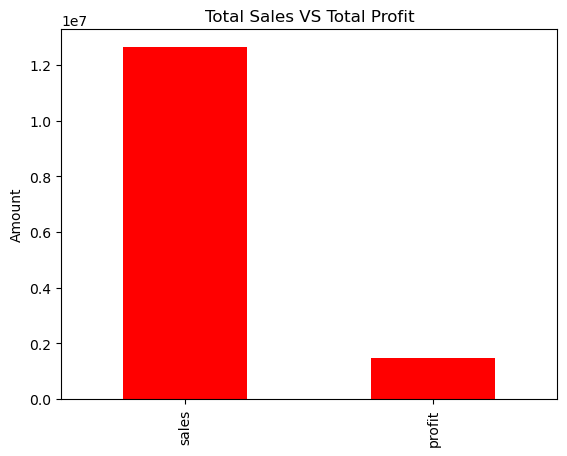

In [65]:
#######                                        TOTAL SALES & PROFIT CHART(COMPANY PERFORMANCES)
## WHY? (SHOWS IS COMPANY MAKING MONEY OR NOT)
summary = df[["sales","profit"]].sum()

summary.plot(kind='bar',color=['red'])
plt.title("Total Sales VS Total Profit")
plt.ylabel("Amount")
plt.show()


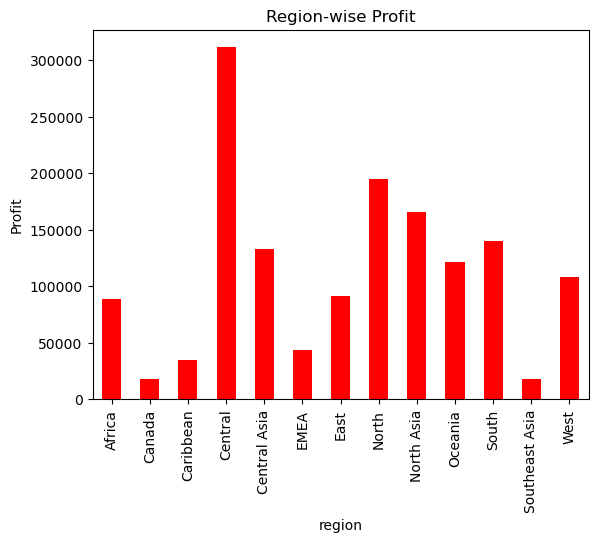

In [69]:
########                                       Region-wise Profit (Best & Worst Regions)
## WHY  (Shows Which area earns / loses money)
Region_profit= df.groupby("region")["profit"].sum()

Region_profit.plot(kind='bar',color=['red'])
plt.title("Region-wise Profit")
plt.ylabel("Profit")
plt.show()

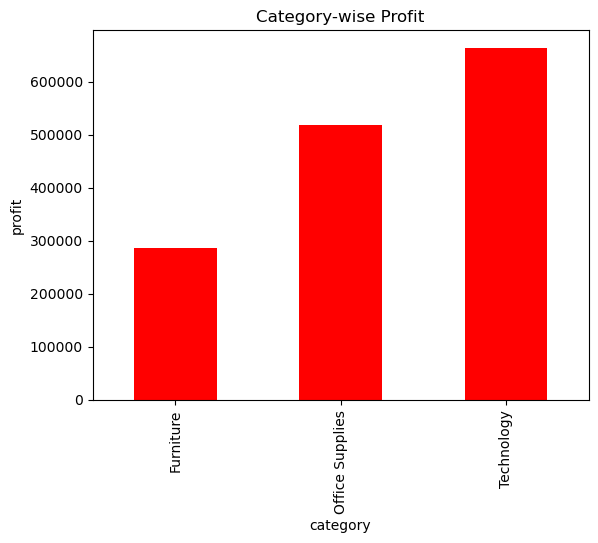

In [78]:
##########                                    Category-wise Profit (Product Strategy)  
## WHY  (Shows Which category is worth investing in)
Category_profit= df.groupby('category')['profit'].sum()

Category_profit.plot(kind='bar',color=['red'])
plt.title('Category-wise Profit')
plt.ylabel('profit')
plt.show()

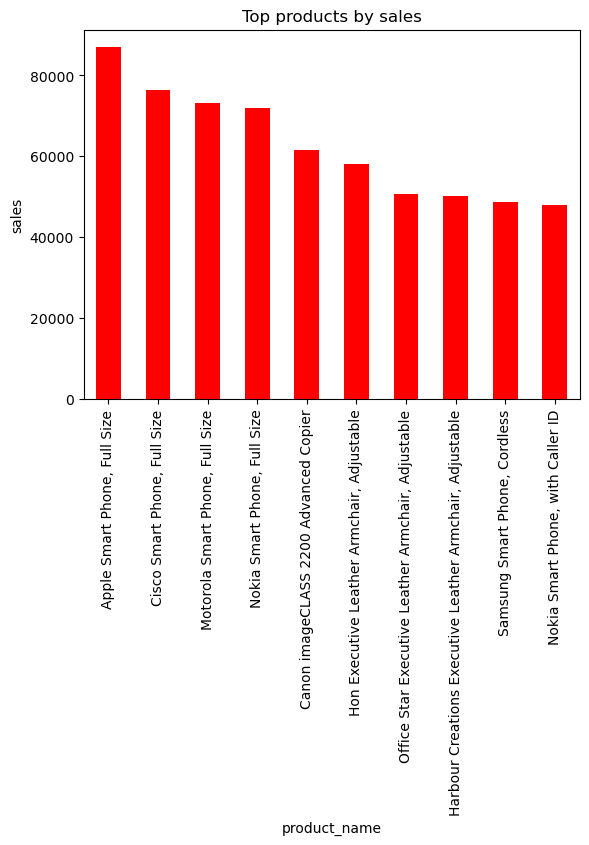

In [84]:
#######                                          Top 10 Products by Sales (Revenue Drivers)
## Why?  (Shows Best-selling products.)
Top_products=(df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10))

Top_products.plot(kind='bar',color='red')
plt.title('Top products by sales')
plt.ylabel("sales")
plt.show()
              

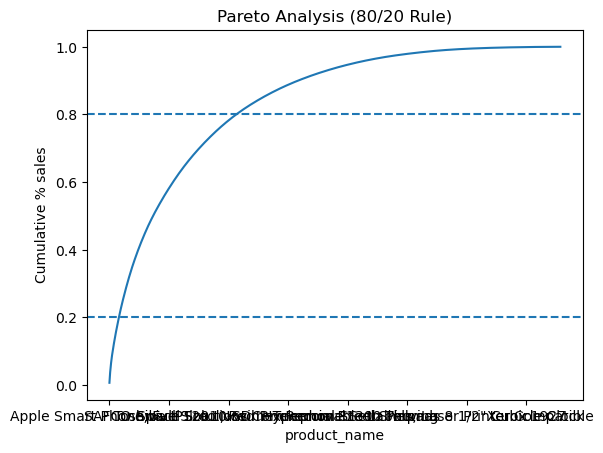

In [98]:
########                                        Pareto Chart (80/20 Rule) 
## WHY? (Shows Do few products make most money?)
sales= df.groupby('product_name')['sales'].sum().sort_values(ascending=False)
pareto= sales.cumsum()/sales.sum()
pareto.plot()
plt.axhline(0.8, linestyle='--')
plt.axhline(0.2, linestyle='--')
plt.title("Pareto Analysis (80/20 Rule)")
plt.ylabel('Cumulative % sales')
plt.show()

In [103]:
df.to_csv("final_sales_data.csv", index=False)
